In [1]:
import sklearn 
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from iaml01cw2_helpers import *
# from iaml01cw2_my_helpers import *

D:\Programme_D\Anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [225]:
print(sklearn.__version__)

0.19.1


In [6]:
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST("C:/Users/larsw/ml/iaml-labs/Coursework 2/data")
Xtrn_orig = np.copy(Xtrn)
Xtst_orig = np.copy(Xtst)

Xtrn = Xtrn / 255.0
Xtst = Xtst / 255.0

Xmean = np.mean(Xtrn, axis=0)
Xmean.shape

Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean

In [8]:
for i in [0,-1]:
    print(i, "\t", Xtrn_nm[i,0:4])

0 	 [-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]
-1 	 [-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]


In [119]:
grid = np.zeros((10, 5, 784))
sample_nums = np.zeros((10, 5), "uint32")

for label in range(10):
    samples_of_class = np.array([Xtrn[i,:] for i in range(len(Xtrn_nm)) if Ytrn[i] == label])
    indices_of_class = np.array([i for i in range(len(Xtrn_nm)) if Ytrn[i] == label])

    class_mean = np.mean(samples_of_class, axis=0)
    
    distances_to_mean = np.array([np.linalg.norm(x - class_mean) for x in samples_of_class])

    ab_unsorted = np.argpartition(distances_to_mean, 2)[:2]
    ab = ab_unsorted[np.argsort(distances_to_mean[ab_unsorted])]

    yz_unsorted = np.argpartition(-distances_to_mean, 2)[:2]
    yz = yz_unsorted[np.argsort(distances_to_mean[yz_unsorted])]

    a = samples_of_class[ab[0]]
    b = samples_of_class[ab[1]]
    y = samples_of_class[yz[0]]
    z = samples_of_class[yz[1]]
    a_num = indices_of_class[ab[0]]
    b_num = indices_of_class[ab[1]]
    y_num = indices_of_class[yz[0]]
    z_num = indices_of_class[yz[1]]
    
    grid[label, 0] = class_mean
    grid[label, 1] = a
    grid[label, 2] = b
    grid[label, 3] = y
    grid[label, 4] = z
    
    sample_nums[label, 1] = a_num
    sample_nums[label, 2] = b_num
    sample_nums[label, 3] = y_num
    sample_nums[label, 4] = z_num

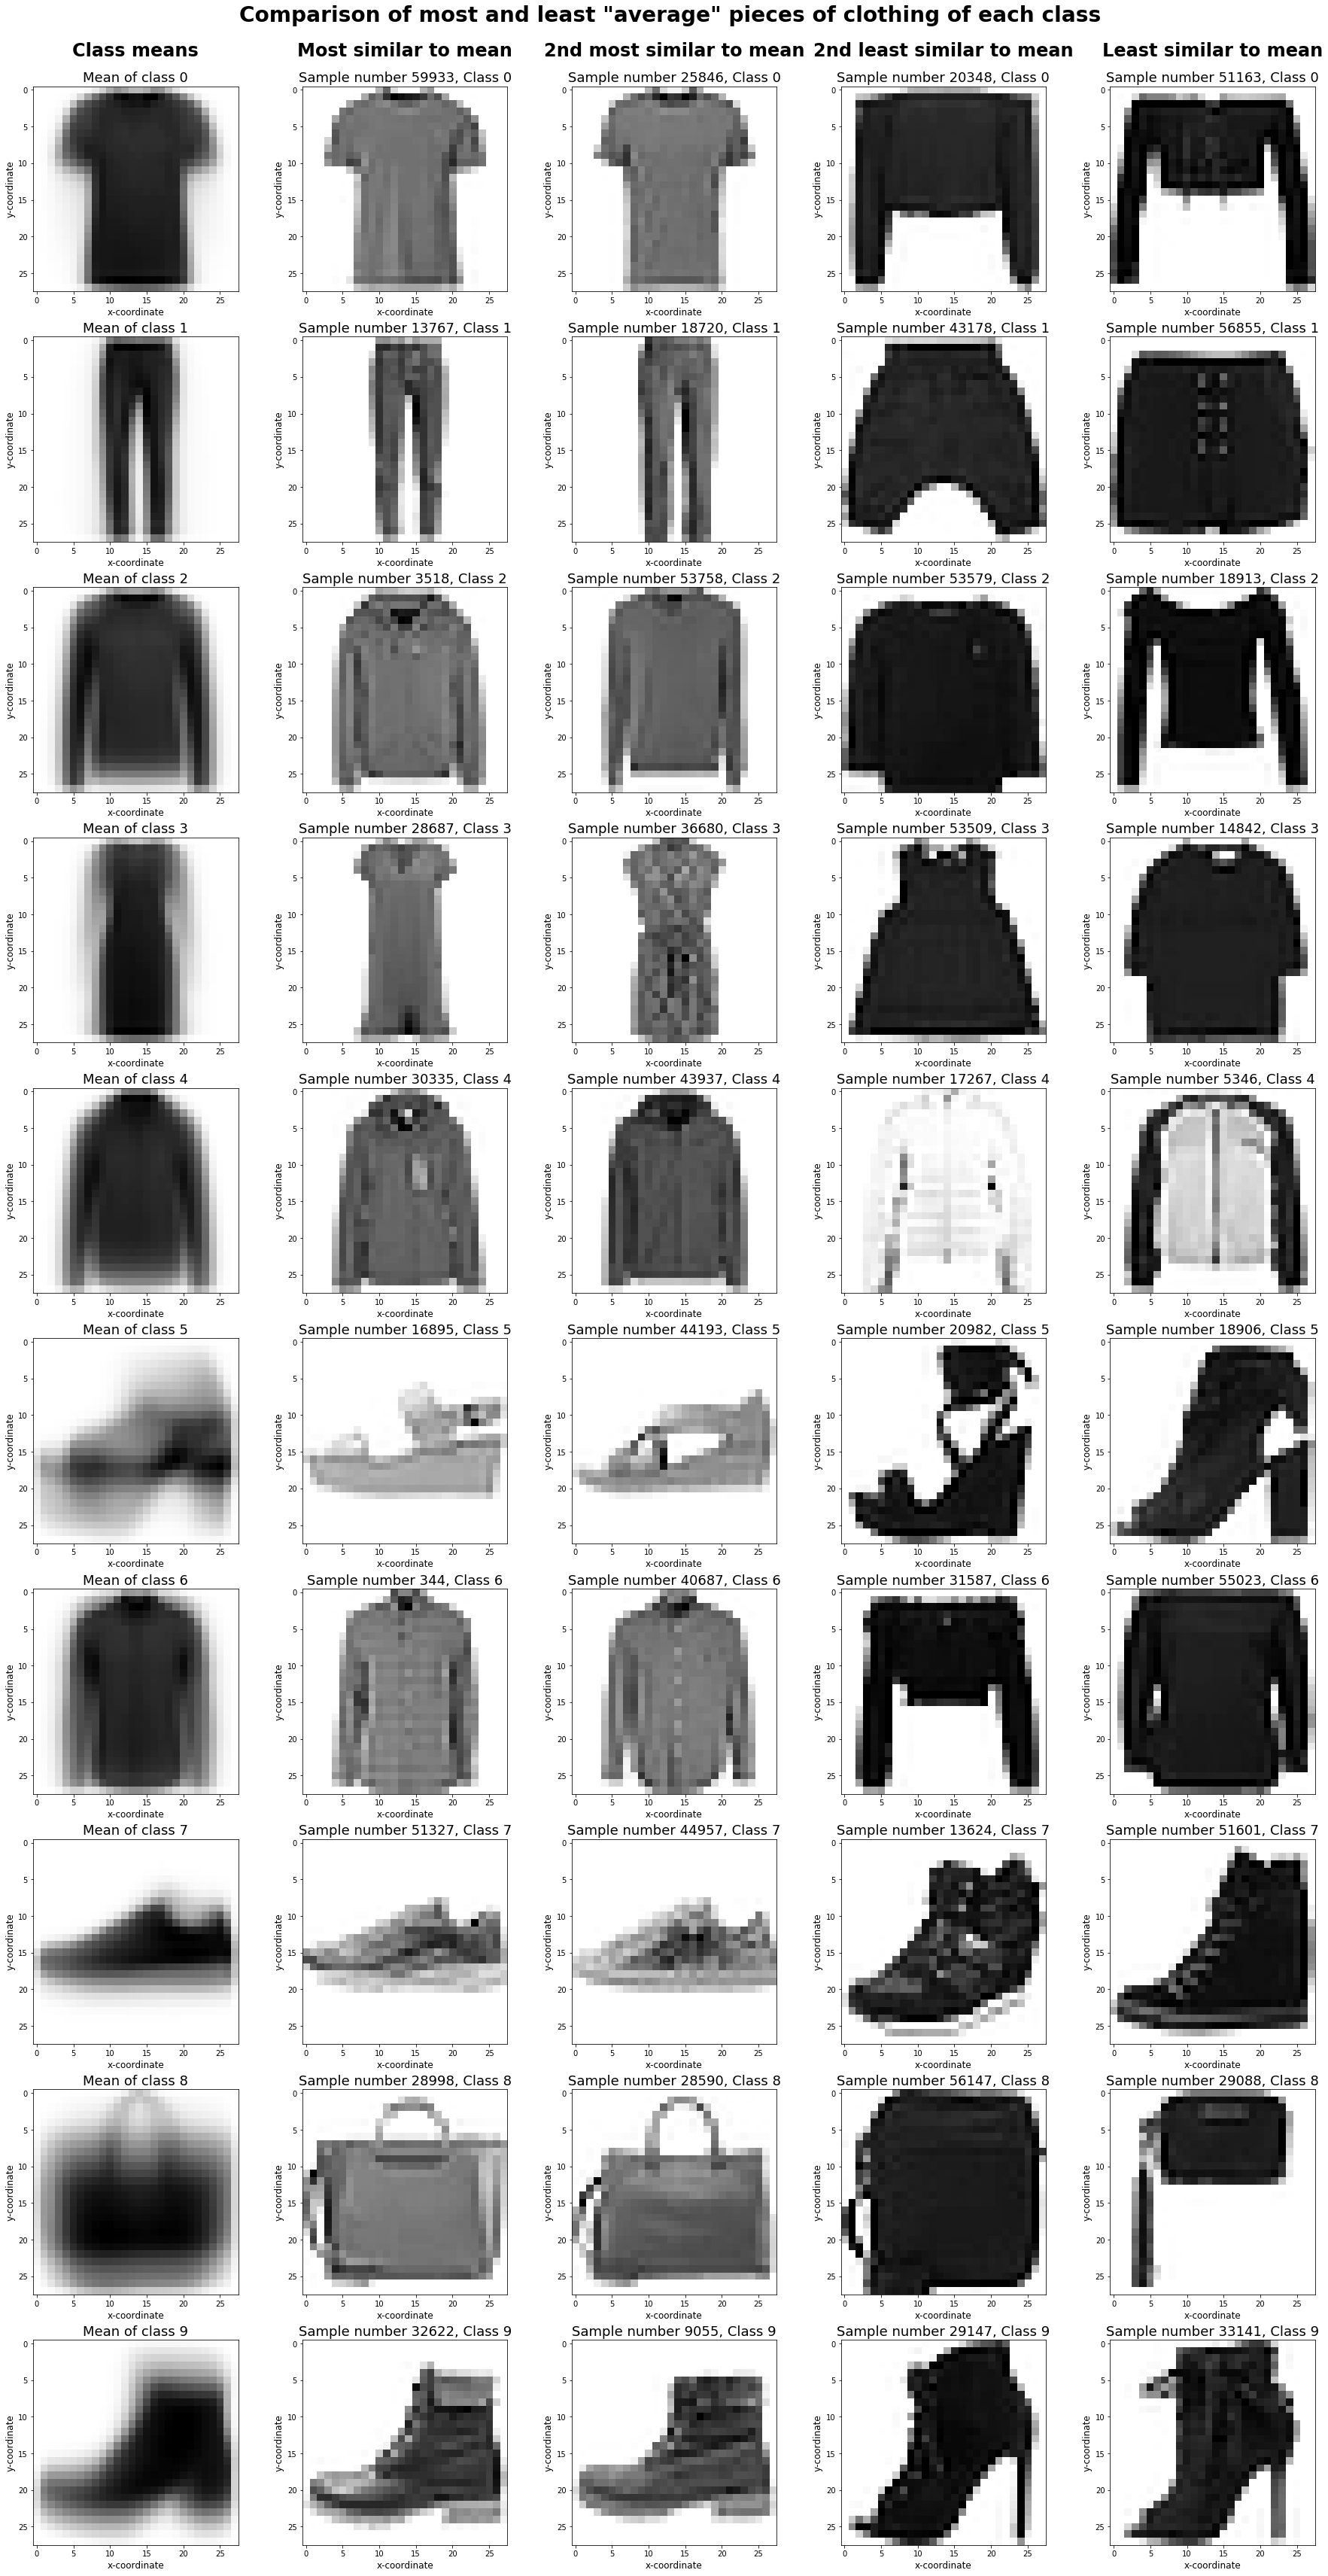

In [325]:
fig, ax = plt.subplots(nrows=10, ncols=5, figsize=(25,50))

st = fig.suptitle("Comparison of most and least \"average\" " 
                  "pieces of clothing of each class", fontsize=28, weight="bold")

cols = ["Class means", "Most similar to mean", "2nd most similar to mean", 
        "2nd least similar to mean", "Least similar to mean"]
pad = 40
for a, col in zip(ax[0], cols):
    a.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline', fontsize=24, weight="bold")

for label in range(10):
    for j in range(5):
        vis = grid[label][j].reshape(28, 28)
        ax[label][j].imshow(vis, cmap="gray_r")
        ax[label][j].set_xlabel("x-coordinate", fontsize=12)
        ax[label][j].set_ylabel("y-coordinate", fontsize=12)
        if j == 0:
            ax[label][j].set_title("Mean of class " + str(label), fontsize=18)
        else:
            ax[label][j].set_title("Sample number " + str(sample_nums[label, j]) + ", Class " + str(label), fontsize=18)
    
        
fig.tight_layout()

st.set_y(0.95)
fig.subplots_adjust(top=0.92)

plt.show()

In [146]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(Xtrn_nm)
ex_var = pca.explained_variance_

In [147]:
print(ex_var[0:5])
sum(ex_var)

[19.80980567 12.11221047  4.10615661  3.38182839  2.62477022]


68.21739795109501

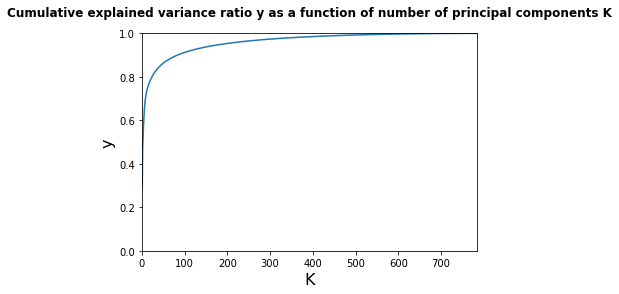

In [198]:
cum_ex_var = np.cumsum(pca.explained_variance_ratio_)
xs = [i for i in range(1, 785)]
plt.plot(xs, cum_ex_var)
plt.axis([1, 784, 0, 1])
t = plt.title("Cumulative explained variance ratio y as a function of number of principal components K", 
              weight="bold")
t.set_y(1.05)
plt.xlabel("K", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.show()

In [223]:
print(cum_ex_var[4])
print(cum_ex_var[49])
print(cum_ex_var[83])
print(cum_ex_var[186])
print(cum_ex_var[783])

0.6161884303430368
0.8626917002845211
0.9006231349614562
0.9500039103537347
1.0000000000000007


In [228]:
top_ten_components = pca.components_[:10]
ex_var = pca.explained_variance_

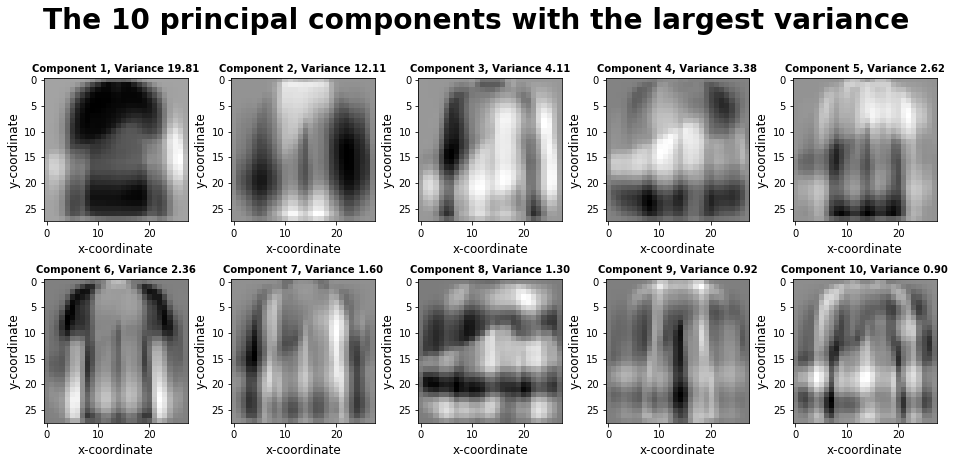

In [324]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(16,7), gridspec_kw = {'wspace':0.3, 'hspace':0.4})

st = fig.suptitle("The 10 principal components with the largest variance", fontsize=28, weight="bold")

cols = ["Class means", "Most similar to mean", "2nd most similar to mean", 
        "2nd least similar to mean", "Least similar to mean"]

for i in range(10):
    vis = top_ten_components[i].reshape(28, 28)
    ax[i//5][i%5].imshow(vis, cmap="gray_r")
    ax[i//5][i%5].set_xlabel("x-coordinate", fontsize=12)
    ax[i//5][i%5].set_ylabel("y-coordinate", fontsize=12)
    ax[i//5][i%5].set_title("Component " + str(i + 1) + ", Variance " + "{:.2f}".format(ex_var[i]), fontsize=10, weight="bold")

st.set_y(0.95)
fig.subplots_adjust(top=0.81)

fig.tight_layout()

plt.show()

In [297]:
pivots = np.zeros((10,784))
reconstructed_pivots = np.zeros((10,4,784))
Ks = [5, 20, 50, 200]
for j in range(4):
    K = Ks[j]
    pca = PCA(n_components=K)
    pca.fit(Xtrn_nm)
    for label in range(10):
        samples_of_class = np.array([Xtrn_nm[i,:] for i in range(len(Xtrn_nm)) if Ytrn[i] == label])
        pivot = samples_of_class[0]
        pivots[label] = pivot
        pivot_trans = pca.transform([pivot])[0]
        reconstructed_pivot = sum([pivot_trans[i] * pca.components_[i] for i in range(K)])
        reconstructed_pivots[label, j] = reconstructed_pivot

In [300]:
rmses = np.zeros((10,4))
for i in range(10):
    pivot = pivots[i]
    for j in range(4):
        reconstructed_pivot = reconstructed_pivots[i][j]
        t = 0
        for k in range(784):
            t += (reconstructed_pivot[k] - pivot[k])**2
        t = t/784
        t = np.sqrt(t)
        rmses[i,j] = t

In [304]:
for i in range(10):
    print("Class", i, ":")
    print(rmses[i])

Class 0 :
[0.25614866 0.15007998 0.12774033 0.06045478]
Class 1 :
[0.1980244  0.14042286 0.09544776 0.03593061]
Class 2 :
[0.19870015 0.14557635 0.12325941 0.0801672 ]
Class 3 :
[0.14565798 0.10722254 0.08364653 0.05645834]
Class 4 :
[0.1182087  0.10262199 0.0879301  0.04578407]
Class 5 :
[0.18112976 0.15866584 0.14292387 0.08883428]
Class 6 :
[0.12947928 0.09593994 0.0724428  0.04583448]
Class 7 :
[0.16562538 0.12782438 0.10674839 0.06417828]
Class 8 :
[0.22339659 0.1449872  0.1234104  0.09037575]
Class 9 :
[0.18351042 0.15113362 0.12167262 0.07263555]


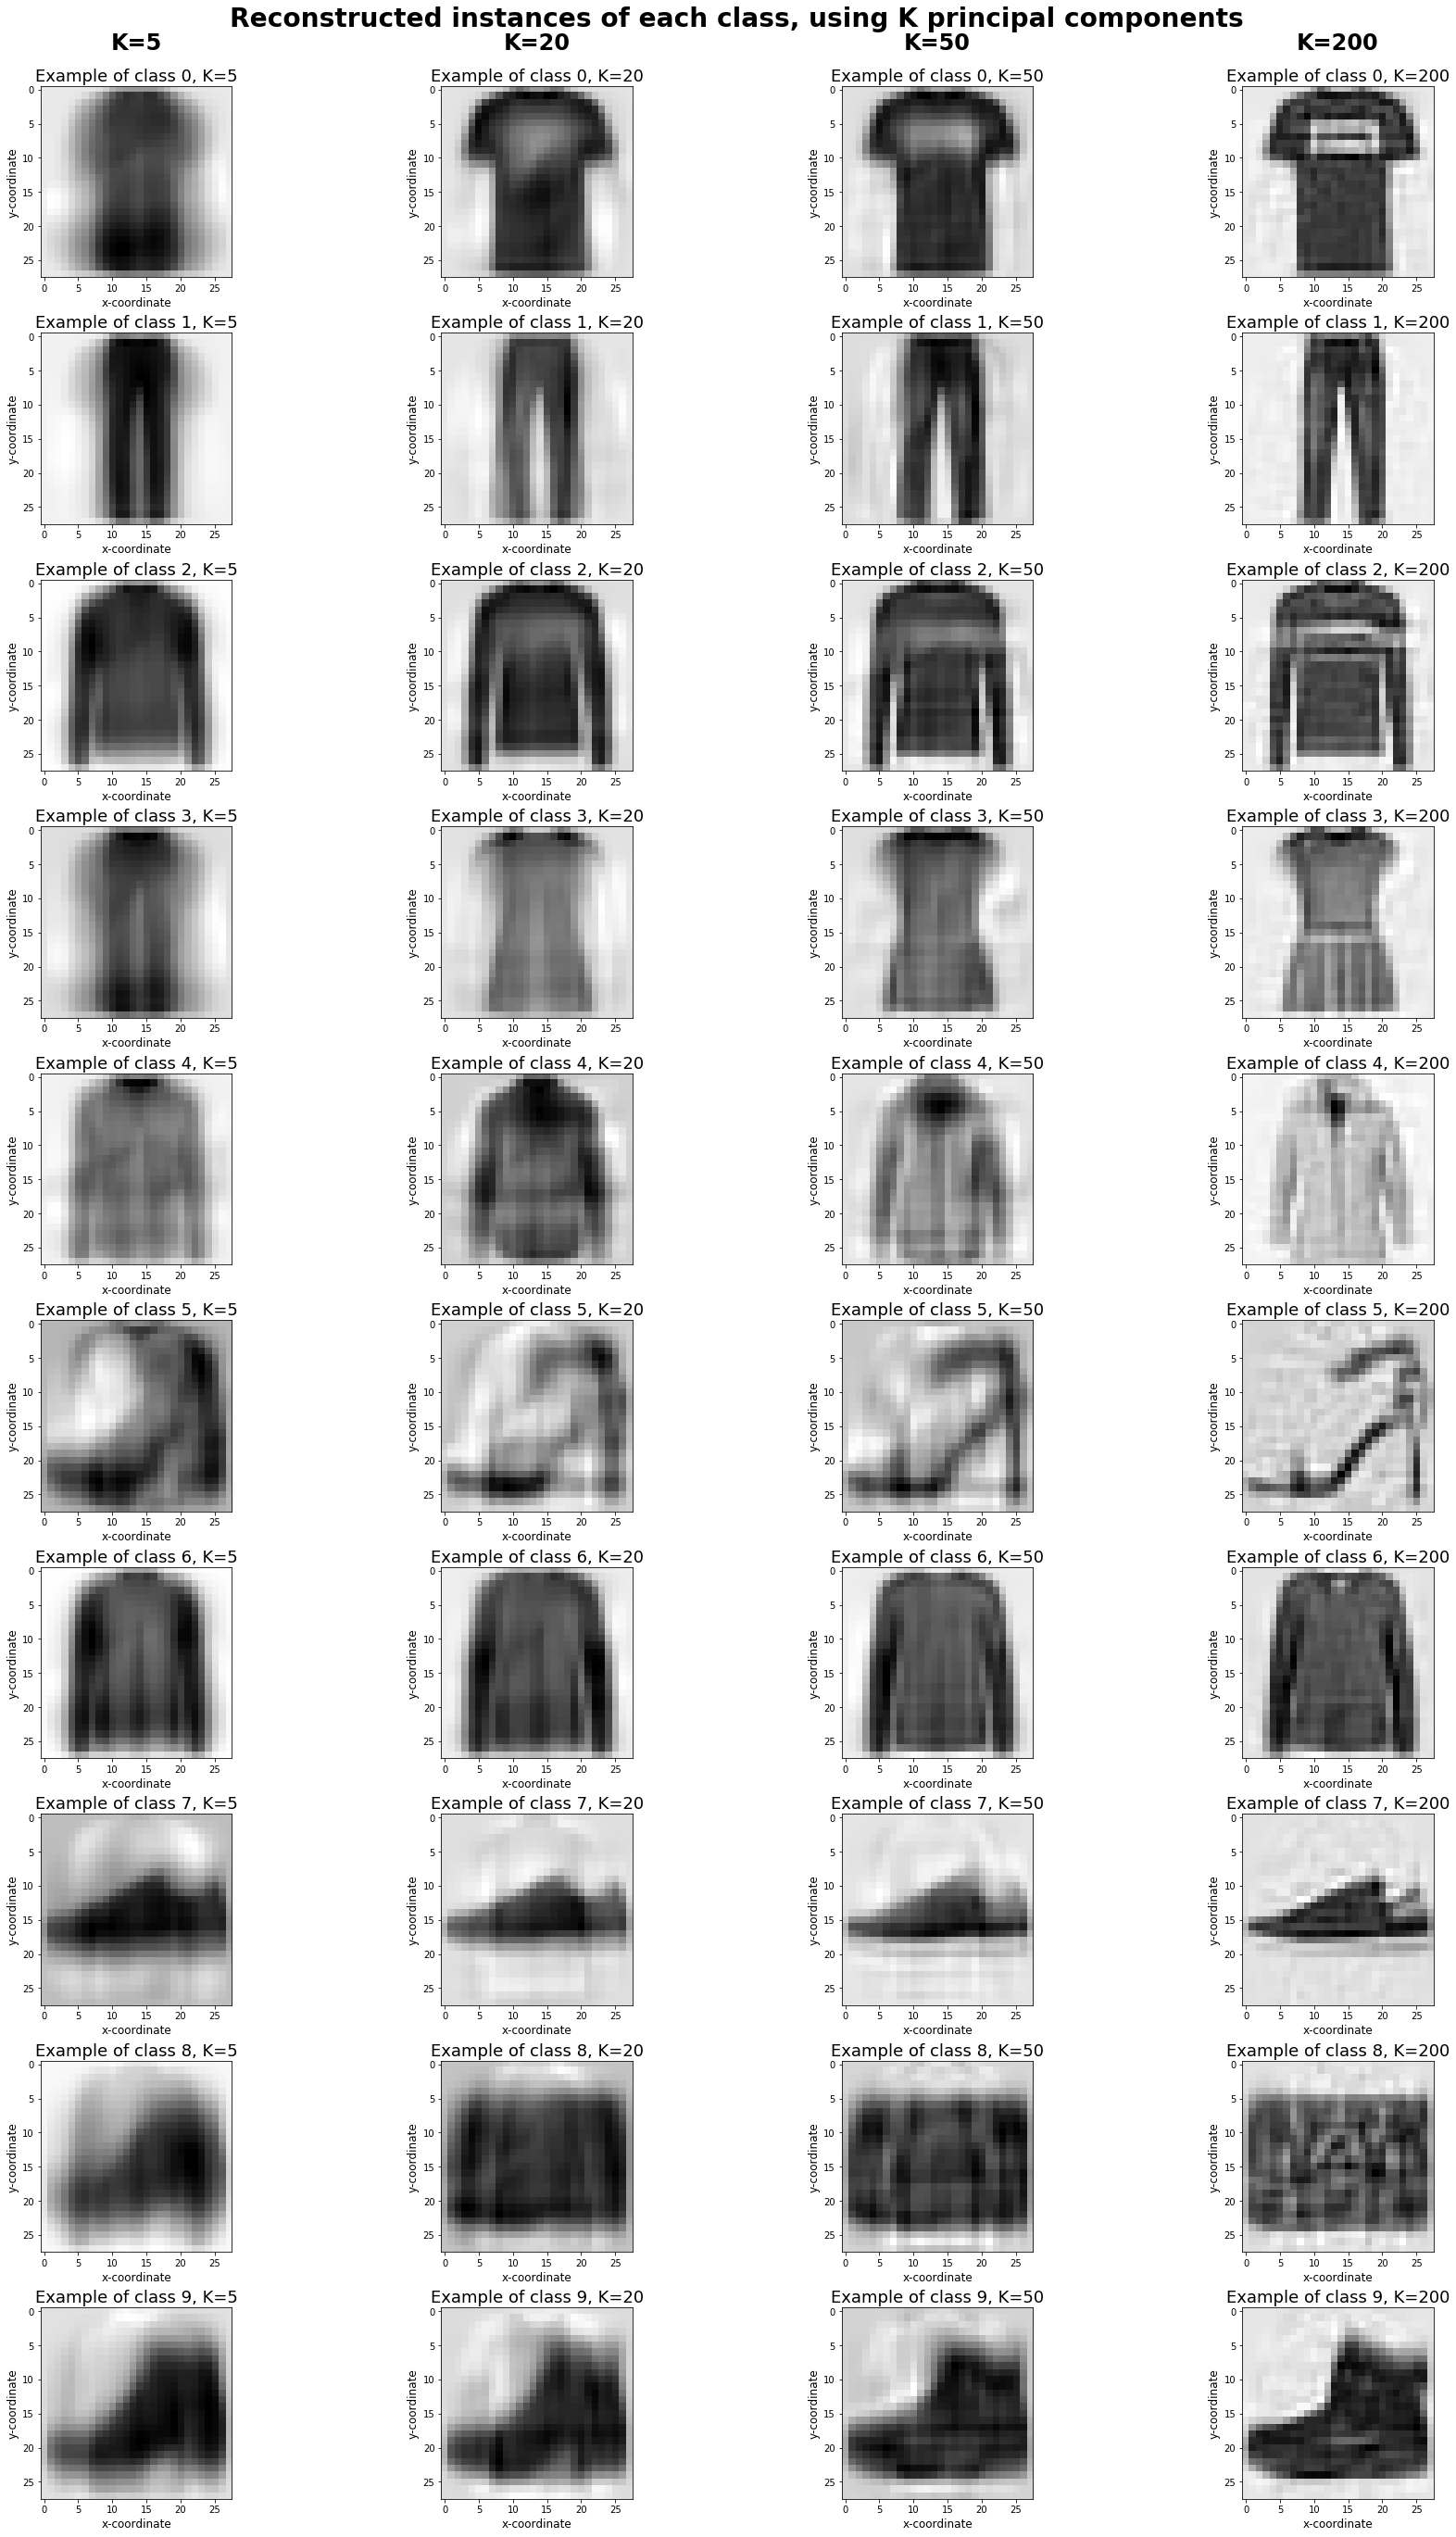

In [326]:
fig, ax = plt.subplots(nrows=10, ncols=4, figsize=(25,40))

st = fig.suptitle("Reconstructed instances of each class, using K principal components", fontsize=28, weight="bold")

cols = ["K=5", "K=20", "K=50", "K=200"]
pad = 40
for a, col in zip(ax[0], cols):
    a.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline', fontsize=24, weight="bold")

for label in range(10):
    for j in range(4):
        vis = (reconstructed_pivots[label][j] + Xmean).reshape(28, 28)
        ax[label][j].imshow(vis, cmap="gray_r")
        ax[label][j].set_xlabel("x-coordinate", fontsize=12)
        ax[label][j].set_ylabel("y-coordinate", fontsize=12)
        ax[label][j].set_title("Example of class " + str(label) + ", K=" + str(Ks[j]), fontsize=18)
        
fig.tight_layout()

st.set_y(0.95)
fig.subplots_adjust(top=0.92)

plt.show()

In [328]:
pca = PCA(n_components=2)
pca.fit(Xtrn_nm)
two_d_rep = pca.transform(Xtrn_nm)

In [330]:
two_d_rep.shape

(60000, 2)

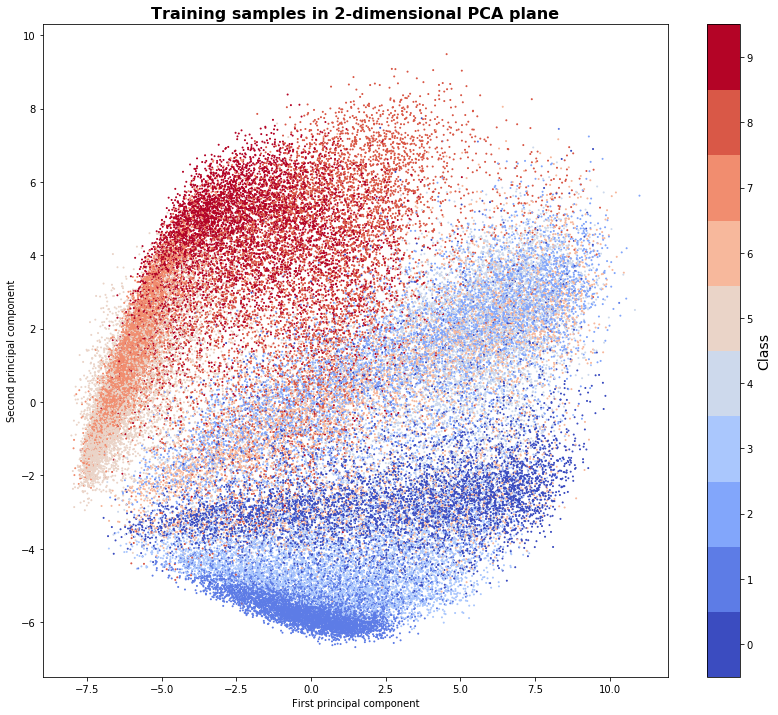

In [412]:
fig, ax = plt.subplots(figsize=(14, 12))
sc = plt.scatter(two_d_rep[:,0], two_d_rep[:, 1], c=Ytrn, cmap=plt.get_cmap('coolwarm'), s=1)
plt.title("Training samples in 2-dimensional PCA plane", weight="bold", fontsize=16)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
#bar = plt.colorbar()
cbar = plt.colorbar(sc, ticks=np.arange(0,11), boundaries=np.arange(0,11)-0.5)
cbar.ax.set_ylabel("Class", fontsize=14)
plt.show()